### 

Objective:
    To predict the factors which leads to user adoption from the take home users dataset.
    

In [ ]:
import pandas as pd
import seaborn as sns

In [3]:
activity = pd.read_csv('takehome_user_engagement.csv')
users = pd.read_csv('takehome_users.csv')

In [4]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
print(activity)

                 time_stamp  user_id  visited
0       2014-04-22 03:53:30        1        1
1       2013-11-15 03:45:04        2        1
2       2013-11-29 03:45:04        2        1
3       2013-12-09 03:45:04        2        1
4       2013-12-25 03:45:04        2        1
...                     ...      ...      ...
207912  2013-09-06 06:14:15    11996        1
207913  2013-01-15 18:28:37    11997        1
207914  2014-04-27 12:45:16    11998        1
207915  2012-06-02 11:55:59    11999        1
207916  2014-01-26 08:57:12    12000        1

[207917 rows x 3 columns]


In [7]:
print(users)

       object_id        creation_time               name  \
0              1  2014-04-22 03:53:30     Clausen August   
1              2  2013-11-15 03:45:04      Poole Matthew   
2              3  2013-03-19 23:14:52  Bottrill Mitchell   
3              4  2013-05-21 08:09:28    Clausen Nicklas   
4              5  2013-01-17 10:14:20          Raw Grace   
...          ...                  ...                ...   
11995      11996  2013-09-06 06:14:15       Meier Sophia   
11996      11997  2013-01-10 18:28:37      Fisher Amelie   
11997      11998  2014-04-27 12:45:16        Haynes Jake   
11998      11999  2012-05-31 11:55:59       Faber Annett   
11999      12000  2014-01-26 08:57:12         Lima Tha�s   

                            email     creation_source  \
0        AugustCClausen@yahoo.com        GUEST_INVITE   
1          MatthewPoole@gustr.com          ORG_INVITE   
2      MitchellBottrill@gustr.com          ORG_INVITE   
3       NicklasSClausen@yahoo.com        GUEST_INVI

In [8]:
def keep_repeat_users(df, visited=3):

    new_df = df.groupby('user_id').filter(lambda x: len(x) >= visited)
    return new_df

def active_users(period, days_logged, user):


    visited = len(user.index) #get the number of times the user logged in
    i, count = 0, 1
    active_user = False

    while count < days_logged:
        if (i+2) < visited: 
            if (user['time_stamp'].iloc[i + 1] - user['time_stamp'].iloc[i]) <= pd.Timedelta(days=period) and (user['time_stamp'].iloc[i + 1] - user['time_stamp'].iloc[i]) > pd.Timedelta(days=1) :
                count += 1 
                new_timeframe = (user['time_stamp'].iloc[i + 1] - user['time_stamp'].iloc[i])
                if (user['time_stamp'].iloc[i + 2] - user['time_stamp'].iloc[i + 1]) <= new_timeframe and (user['time_stamp'].iloc[i + 2] - user['time_stamp'].iloc[i + 1]) > pd.Timedelta(days=1):
                    active_user = True 
                    count += 1
                else: 
                    i += 1
                    count = 1
            else:
                i += 1
                count = 1
        else:
            count = days_logged
    return active_user

def keep_active_users(df):

    active_peeps = df.filter(lambda x: active_users(period=7, days_logged=3, user=x) ==True)
    unique_active_peeps = pd.DataFrame(pd.Series.unique(active_peeps['user_id']))
    unique_active_peeps.columns = ['user_id']

    return unique_active_peeps

In [9]:
activity['time_stamp'] = pd.to_datetime(activity['time_stamp'])

In [10]:
# users who have logged at least 3 days data
repeated_users_data = keep_repeat_users(activity)
print(repeated_users_data)

                time_stamp  user_id  visited
1      2013-11-15 03:45:04        2        1
2      2013-11-29 03:45:04        2        1
3      2013-12-09 03:45:04        2        1
4      2013-12-25 03:45:04        2        1
5      2013-12-31 03:45:04        2        1
...                    ...      ...      ...
207905 2014-04-20 14:22:45    11991        1
207906 2014-04-25 14:22:45    11991        1
207907 2014-04-28 14:22:45    11991        1
207908 2014-05-17 14:22:45    11991        1
207909 2014-05-30 14:22:45    11991        1

[201002 rows x 3 columns]


In [11]:
grouped_users_data = repeated_users_data.groupby('user_id')


In [12]:
#Apply function to see if logged 3 separate days in 7 day period
unique_active_users_data = keep_active_users(grouped_users_data)

In [13]:
print(unique_active_users_data)

      user_id
0           2
1          10
2          33
3          42
4          50
...       ...
1610    11969
1611    11975
1612    11980
1613    11988
1614    11991

[1615 rows x 1 columns]


In [14]:
# Indicator variable if they are an adopted user or not
unique_active_users_data['adopted_user'] = 1

In [15]:
# Merge adopted user dataframe with original dataframe
adoption_data = pd.merge(unique_active_users_data, users, how='outer',
                  left_on='user_id', right_on='object_id')

In [16]:
# Filll non-adopted users with 0
adoption_data['adopted_user'] = adoption_data['adopted_user'].fillna(0)
adoption_data

,user_id,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2.0,1.0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
1,10.0,1.0,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0
2,33.0,1.0,33,2014-03-11 06:29:09,Araujo Jos�,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0
3,42.0,1.0,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN
4,50.0,1.0,50,2012-06-03 11:02:08,Oliveira Gabrielly,GabriellyAlmeidaOliveira@gmail.com,GUEST_INVITE,1.350990e+09,0,0,61,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,NaN,0.0,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,NaN,0.0,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,NaN,0.0,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,NaN,0.0,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [17]:
print(len(adoption_data))

12000


In [18]:
# Adopted user's data
adopted_user_data=adoption_data.loc[adoption_data['adopted_user'] == 1.0]
adopted_user_data

,user_id,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2.0,1.0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
1,10.0,1.0,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0
2,33.0,1.0,33,2014-03-11 06:29:09,Araujo Jos�,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0
3,42.0,1.0,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN
4,50.0,1.0,50,2012-06-03 11:02:08,Oliveira Gabrielly,GabriellyAlmeidaOliveira@gmail.com,GUEST_INVITE,1.350990e+09,0,0,61,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1610,11969.0,1.0,11969,2013-06-01 00:48:14,Dickinson Aidan,AidanDickinson@hotmail.com,GUEST_INVITE,1.401411e+09,1,1,52,6647.0
1611,11975.0,1.0,11975,2013-03-23 11:10:11,Daecher J�rgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0
1612,11980.0,1.0,11980,2014-02-02 15:23:18,Gloeckner Franziska,ljnnbqdr@cgbld.com,ORG_INVITE,1.397835e+09,0,0,406,3068.0
1613,11988.0,1.0,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN


In [19]:
print("Total adopted users: "+ str(len(adopted_user_data)))

Total adopted users: 1615


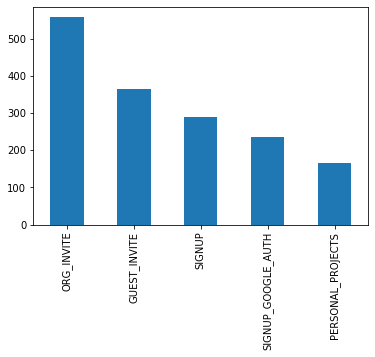

In [20]:
# Creation Source wise adopted users
adopted_user_data['creation_source'].value_counts().plot.bar()

Number of adopted user's count is high with the users whose creation source is ORT_INVITE
Second is GUEST_INVITE .

OUTCOME: Invited user are mostly adopted 

In [21]:
# Non adopted user's data

In [22]:
non_adopted_user_data=adoption_data.loc[adoption_data['adopted_user'] == 0.0]
non_adopted_user_data

,user_id,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
1615,NaN,0.0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1616,NaN,0.0,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
1617,NaN,0.0,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
1618,NaN,0.0,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
1619,NaN,0.0,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,NaN,0.0,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,NaN,0.0,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,NaN,0.0,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,NaN,0.0,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


Total non-adopted users: 10385


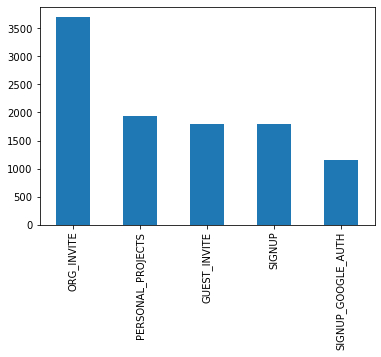

In [23]:
print("Total non-adopted users: "+ str(len(non_adopted_user_data)))
non_adopted_user_data['creation_source'].value_counts().plot.bar()

In [24]:
#Analysis with "Enabled for Marketing drip"
adopted_user_data.groupby("enabled_for_marketing_drip")["adopted_user"].count()

enabled_for_marketing_drip
0    1361
1     254
Name: adopted_user, dtype: int64

User who are not enabled for marketing drip are more adopted .

In [25]:
#Analysis with "opted_in_to_mailing_list"
adopted_user_data.groupby("opted_in_to_mailing_list")["adopted_user"].count()

opted_in_to_mailing_list
0    1199
1     416
Name: adopted_user, dtype: int64

User who are not Opted in to mailing list are adopted more.